Can we see an upwelling signal in the HYCOM results?

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt 
import datetime
import numpy as np
import os
import glob


from salishsea_tools import viz_tools, tidetools
%matplotlib inline

# Domain coverage

In [2]:
date = '2016-09-06'
base = '/ocean/nsoontie/MEOPAR/HYCOM/nowcast/'
fname = os.path.join(base, date,'rtofs_glo_3dz_nowcast_6hrly_reg2.nc')
print(fname)

/ocean/nsoontie/MEOPAR/HYCOM/nowcast/2016-09-06/rtofs_glo_3dz_nowcast_6hrly_reg2.nc


In [3]:
f = nc.Dataset(fname)

In [4]:
sal=f.variables['salinity']
time = f.variables['time']
dates=nc.num2date(time[:],time.units)
lon=f.variables['lon']
lat=f.variables['lat']
temp = f.variables['temperature']
lev=f.variables['lev']

In [5]:
dates

array([datetime.datetime(2016, 9, 4, 0, 0),
       datetime.datetime(2016, 9, 4, 6, 0),
       datetime.datetime(2016, 9, 4, 12, 0),
       datetime.datetime(2016, 9, 4, 18, 0),
       datetime.datetime(2016, 9, 5, 0, 0),
       datetime.datetime(2016, 9, 5, 6, 0),
       datetime.datetime(2016, 9, 5, 12, 0),
       datetime.datetime(2016, 9, 5, 18, 0),
       datetime.datetime(2016, 9, 6, 0, 0)], dtype=object)

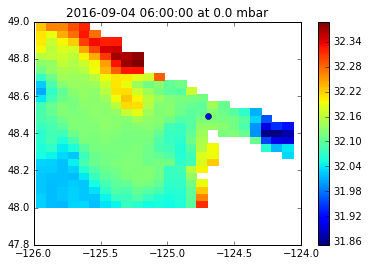

In [6]:
t=1
d=0
mesh = plt.pcolormesh(lon[:],lat[:],sal[t,d,:,:])
plt.colorbar(mesh)
plt.title('{} at {} mbar'.format(dates[t],lev[d]))
j=13
i=16
plt.plot(lon[i],lat[j],'o')

In [7]:
fnames = glob.glob(os.path.join(base,'*','rtofs_glo_3dz_nowcast_6hrly_reg2.nc'))
fnames.sort()
sals = np.zeros((1,lev.shape[0]))
temps = np.zeros((1,lev.shape[0]))
times = np.zeros(1,)
for fname in fnames:
    f = nc.Dataset(fname)
    sal=f.variables['salinity'][1:5,:,j,i]
    temp=f.variables['temperature'][1:5,:,j,i]
    time = f.variables['time']
    dates=nc.num2date(time[:],time.units)[1:5]
    sals = np.concatenate((sals, sal),axis=0)
    temps = np.concatenate((temps, temp),axis=0)
    times = np.concatenate((times, dates),axis=0)
sals=sals[1:,:]
temps = temps[1:,:]
times=times[1:]

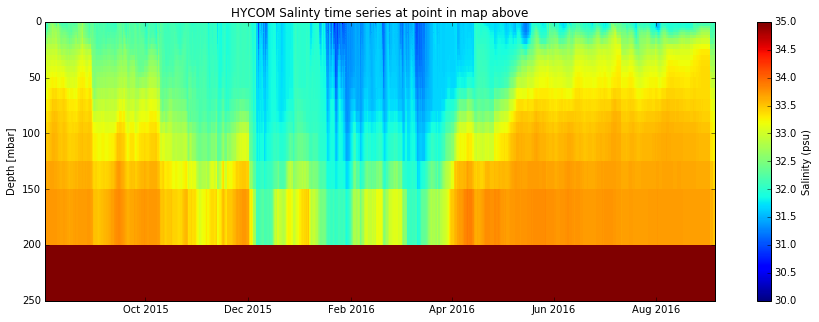

In [8]:
fig,ax=plt.subplots(1,1,figsize=(15,5))
mesh=ax.pcolormesh(times, lev, sals.T,vmin=30,vmax=35)
ax.set_ylim([250,0])
cbar=plt.colorbar(mesh, ax=ax)
cbar.set_label('Salinity (psu)')
ax.set_ylabel('Depth [mbar]')
ax.set_title('HYCOM Salinty time series at point in map above')

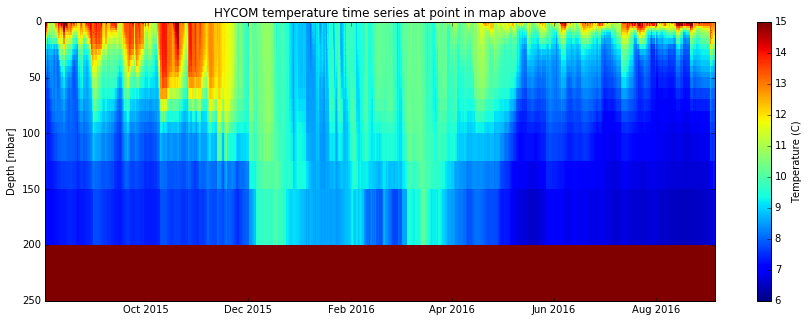

In [9]:
fig,ax=plt.subplots(1,1,figsize=(15,5))
mesh=ax.pcolormesh(times, lev, temps.T,vmin=6,vmax=15)
ax.set_ylim([250,0])
cbar=plt.colorbar(mesh, ax=ax)
cbar.set_label('Temperature (C)')
ax.set_ylabel('Depth [mbar]')
ax.set_title('HYCOM temperature time series at point in map above')

* Neat to see the strong mixing in the winter. I don't have a full year data set yet.

## Compare with Boundary Conditions

In [10]:
b = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
f = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/open_boundaries/west/SalishSea2_Masson_corrected.nc')
lonBC = f.variables['nav_lon']
latBC = f.variables['nav_lat']
deptBC = f.variables['deptht']
salBC = f.variables['vosaline']
tempBC = f.variables['votemper']
t = f.variables['time_counter']

#Extend temp and salinity by one year...
salBC = np.concatenate((salBC,salBC),axis=0)
tempBC = np.concatenate((tempBC,tempBC),axis=0)

(48, 49)

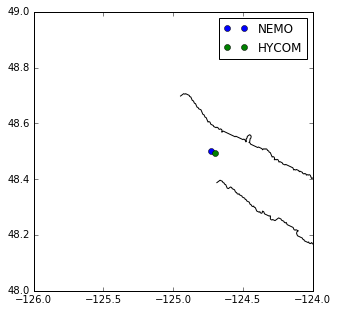

In [11]:
iBC=730
fig,ax=plt.subplots(1,1,figsize=(5,5))
viz_tools.plot_coastline(ax,b,coords='map')
ax.plot(lonBC[0,iBC],latBC[0,iBC],'o',label='NEMO')
plt.plot(lon[i],lat[j],'o',label='HYCOM')
ax.legend()
ax.set_xlim([-126,-124])
ax.set_ylim([48,49])

In [12]:
d1 = datetime.datetime(2015,1,1)
datesBC=[d1+datetime.timedelta(weeks=int(d-1)) for d in t]
d2 = datetime.datetime(2016,1,1)
datesBC = np.concatenate((datesBC, [d2+datetime.timedelta(weeks=int(d-1)) for d in t] ),axis=0)

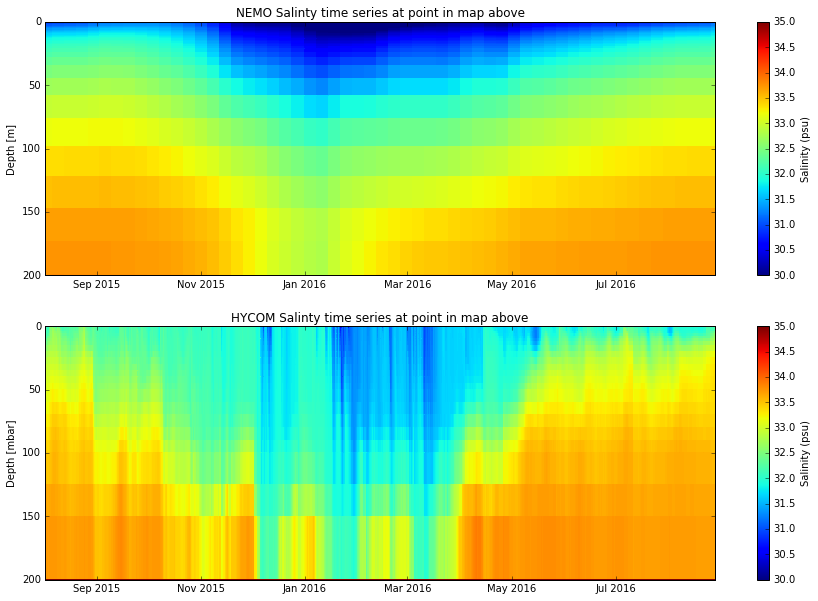

In [13]:
fig,axs=plt.subplots(2,1,figsize=(15,10))
#NEMO
ax=axs[0]
mesh=ax.pcolormesh(datesBC, deptBC, salBC[:,:,0,iBC].T,vmin=30,vmax=35)
cbar=plt.colorbar(mesh, ax=ax)
cbar.set_label('Salinity (psu)')
ax.set_ylabel('Depth [m]')
ax.set_title('NEMO Salinty time series at point in map above')
#HYCOM
ax=axs[1]
mesh=ax.pcolormesh(times, lev, sals.T,vmin=30,vmax=35)
cbar=plt.colorbar(mesh, ax=ax)
cbar.set_label('Salinity (psu)')
ax.set_ylabel('Depth [mbar]')
ax.set_title('HYCOM Salinty time series at point in map above')

for ax in axs:
    ax.set_ylim([200,0])
    ax.set_xlim([datetime.datetime(2015,8,2), datetime.datetime(2016,8,28)])

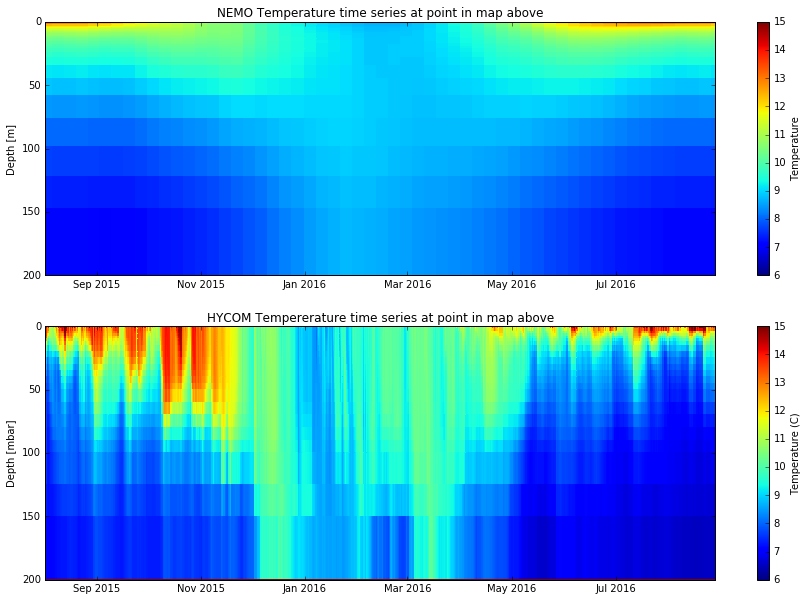

In [14]:
fig,axs=plt.subplots(2,1,figsize=(15,10))
#NEMO
ax=axs[0]
mesh=ax.pcolormesh(datesBC, deptBC, tempBC[:,:,0,iBC].T,vmin=6,vmax=15)
cbar=plt.colorbar(mesh, ax=ax)
cbar.set_label('Temperature')
ax.set_ylabel('Depth [m]')
ax.set_title('NEMO Temperature time series at point in map above')
#HYCOM
ax=axs[1]
mesh=ax.pcolormesh(times, lev, temps.T,vmin=6,vmax=15)
cbar=plt.colorbar(mesh, ax=ax)
cbar.set_label('Temperature (C)')
ax.set_ylabel('Depth [mbar]')
ax.set_title('HYCOM Tempererature time series at point in map above')

for ax in axs:
    ax.set_ylim([200,0])
    ax.set_xlim([datetime.datetime(2015,8,2), datetime.datetime(2016,8,28)])